# Lecture W06 - Exploring Spatial Data

## Test Data
* http://spatial.binghamton.edu/geog503/data/lecture6_data.zip

## Checking for the Existence of Data

* **Two types of paths**
    - System paths
    - Catalog paths
* **General syntax**
    - os.path.exists(<dataset>)
    - arcpy.Exists(<dataset>)


In [1]:
try:
    import archook #The module which locates arcgis
    archook.get_arcpy()
    import arcpy
except ImportError:
    print("import arcpy error")

In [2]:
import os
os.path.exists(r"C:\Geog503\data\cities.shp")

True

In [3]:
import arcpy
arcpy.Exists(r"C:\Geog503\data\cities.shp")

True

In [4]:
import os
os.path.exists(r"C:\Geog503\data\testdata.gdb\buffers_poly")

False

In [5]:
import arcpy
arcpy.Exists(r"C:\Geog503\data\testdata.gdb\buffers_poly")

True

## Describing Data

* **The Describe function is used to determine properties of dataset**
* **General syntax**
    - import arcpy
    - < variable> = arcpy.Describe(< input dataset>)
* **Online help**
    - <http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/describe.htm>


In [6]:
import arcpy
desc = arcpy.Describe(r"C:\Geog503\data\cities.shp")
print(desc.datatype)
print(desc.shapeType)

ShapeFile
Point


In [7]:
import arcpy
arcpy.env.workspace = r"C:\Geog503\data"
arcpy.env.overwriteOutput = True
infc = "railroads.shp"
clipfc = "new_mexico.shp"
# clipfc = "cities.shp"
outfc = "Results/railroads_clip.shp"
desc = arcpy.Describe(clipfc)
type = desc.shapeType
if type == "Polygon":
    arcpy.Clip_analysis(infc, clipfc, outfc)
    print("Clip analysis run successfully.")
else:
    print("The clip features are not polygons.")

Clip analysis run successfully.


## Display shapefiles in Jupyter Notebook

* use geopandas
* https://www.linkedin.com/pulse/using-geopandas-display-shapefiles-jupyter-notebooks-andrew-cutts
* http://geopandas.org/mapping.html

### How to install the geopandas package
Open Anaconda Prompt and enter the following commands
* `activate arcgis`
* `conda install -y geopandas`

In [8]:
import geopandas as gpd

In [9]:
import os
workspace = r"C:\geog503\data"
os.chdir(workspace)

In [10]:
railroads = gpd.read_file('railroads.shp')
new_mexico = gpd.read_file('new_mexico.shp')
railroads_clip = gpd.read_file('Results/railroads_clip.shp')

In [11]:
print(railroads)

    FNODE_  TNODE_    LENGTH  RAILRDL020  \
0     4270    4362  0.638979        5433   
1     4364    4362  0.394658        5435   
2     4442    4443  0.186551        5532   
3     4444    4443  0.928203        5533   
4     4445    4264  0.730855        5534   
5     4443    4482  0.262239        5583   
6     4482    4445  1.289620        5594   
7     4493    4494  0.689676        5598   
8     4364    4520  1.010250        5631   
9     4520    4530  0.246030        5642   
10    4362    4565  1.290530        5687   
11    4445    4565  0.614816        5688   
12    4482    4582  0.419335        5707   
13    4585    4565  0.084762        5711   
14    4585    4588  0.477493        5717   
15    4746    4747  0.557005        5898   
16    4836    4837  0.520972        5990   
17    4836    4851  0.321430        6008   
18    4878    4877  0.337298        6036   
19    4924    4925  0.259129        6089   
20    5047    5044  0.651989        6252   
21    4837    5078  1.274030    

In [12]:
print(new_mexico)

     AREA  PERIMETER  STATESP020       STATE STATE_FIPS  ORDER_ADM MONTH_ADM  \
0  30.888     23.674        1905  New Mexico         35         47   January   

   DAY_ADM  YEAR_ADM                                           geometry  
0        6      1912  POLYGON ((-109.0448837280273 36.99863052368164...  


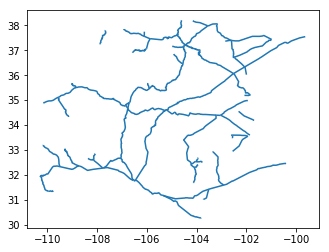

In [14]:
# magic command to display plots within Jupyter Notebook
%matplotlib inline  
railroads.plot()

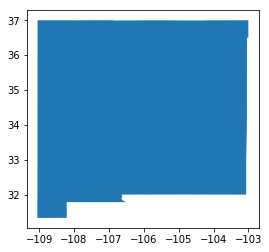

In [15]:
new_mexico.plot()

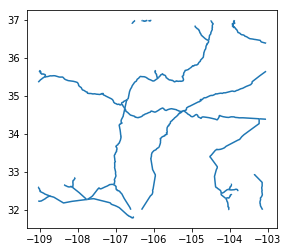

In [16]:
railroads_clip.plot()

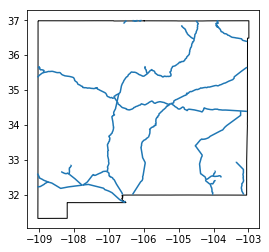

In [17]:
base = new_mexico.plot(color='white', edgecolor='black')
railroads_clip.plot(ax=base)

## The Describe function

* Describe function will always return a **Describe object**
* The Describe function returns a set of **generic properties** for all Describe objects.

<img style="float: left;" src="http://spatial.binghamton.edu/geog503/images/describe_function.png" width = 400>

* **Generic Describe Object Properties**

<img style="float: left;" src="http://spatial.binghamton.edu/geog503/images/generic_describe_props.png" width = 400>

In [18]:
import arcpy
data = r"C:\Geog503\data\cities.shp"
desc = arcpy.Describe(data)
print("baseName:    {}".format(desc.baseName))
print("catalogPath: {}".format(desc.catalogPath))
print("file:        {}".format(desc.file))
print("name:        {}".format(desc.name))
print("path:        {}".format(desc.path))
print("dataType:    {}".format(desc.dataType))
print("extension:   {}".format(desc.extension))

baseName:    cities
catalogPath: C:\Geog503\data\cities.shp
file:        cities.shp
name:        cities.shp
path:        C:\Geog503\data
dataType:    ShapeFile
extension:   shp


## Feature class Describe properties

<img style = "float: left;" src="http://spatial.binghamton.edu/geog503/images/fc_desc_props.png" width = 500>

### Feature Class properties

* <http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/featureclass-properties.htm>

<img style = "float: left;" src="http://spatial.binghamton.edu/geog503/images/fc_props.png" width = 500>

In [19]:
import arcpy

# Create a Describe object from the feature class
desc = arcpy.Describe(r"C:\Geog503\data\cities.shp")

# Print some feature class properties
print("Feature Type:  {}".format(desc.featureType))
print("Shape Type :   {}".format(desc.shapeType))
print("Spatial Index: {}".format(desc.hasSpatialIndex))

Feature Type:  Simple
Shape Type :   Point
Spatial Index: True


### Table properties

* <http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/table-properties.htm>

<img style="float: left;" src="http://spatial.binghamton.edu/geog503/images/table_props.png" width = 500>

In [20]:
import arcpy
# Create a Describe object from the table.
desc = arcpy.Describe(r"C:\Geog503\data\cities.shp")
# If the table has an OID, print the OID field name
if desc.hasOID:
    print("OIDFieldName: {}".format(desc.OIDFieldName))
# Print the names and types of all the fields in the table
for field in desc.fields:
    print("{:22} : {}".format(field.name,field.type))

OIDFieldName: FID
FID                    : OID
Shape                  : Geometry
CITIESX020             : Double
FEATURE                : String
NAME                   : String
POP_RANGE              : String
POP_2000               : Integer
FIPS55                 : String
COUNTY                 : String
FIPS                   : String
STATE                  : String
STATE_FIPS             : String
DISPLAY                : SmallInteger


### Dataset properties

* <http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/dataset-properties.htm>

<img style="float: left;" src="images/dataset_props.png" width = 500>

In [21]:
import arcpy
desc = arcpy.Describe(r"C:\Geog503\data\new_mexico.shp")
print("Dataset Type: {0}".format(desc.datasetType))
print("Extent:\n  XMin: {0}, XMax: {1}, YMin: {2}, YMax: {3}".format(
    desc.extent.XMin, desc.extent.XMax, desc.extent.YMin, desc.extent.YMax))
print("Spatial reference name: {0}:".format(desc.spatialReference.name))

Dataset Type: FeatureClass
Extent:
  XMin: -109.050102234, XMax: -103.000656128, YMin: 31.3318996429, YMax: 36.9994239807
Spatial reference name: GCS_North_American_1983:


### Raster Describe properties

<img style="float: left;" src="http://spatial.binghamton.edu/geog503/images/raster_desc.png" width = 500>

### Raster Dataset properties

* <http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/raster-dataset-properties.htm>

<img style="float: left;" src="http://spatial.binghamton.edu/geog503/images/raster_dataset_props.png" width = 500>

In [22]:
import arcpy
desc = arcpy.Describe(r"C:\Geog503\data\testdata.gdb\ElevationFloat")
print("{:20} {}".format("bandCount:",desc.bandCount))
print("{:20} {}".format("compressionType:",desc.compressionType))
print("{:20} {}".format("format:",desc.format))

bandCount:           1
compressionType:     NONE
format:              FGDBR


### Raster Band properties

* <http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/raster-band-properties.htm>

<img style="float: left;" src="http://spatial.binghamton.edu/geog503/images/raster_band_props.png" width = 500>

In [23]:
import arcpy
desc = arcpy.Describe(r"C:\Geog503\data\testdata.gdb\ElevationFloat")
print("{:15} {}".format("height: ", desc.height))
print("{:15} {}".format("width:", desc.width))
print("{:15} {}".format("pixelType:", desc.pixelType))
print("{:15} {}".format("isInteger:", desc.isInteger))

height:         207
width:          233
pixelType:      F32
isInteger:      False


## Describing Data: Example

In [24]:
import arcpy
arcpy.env.workspace = r"C:\Geog503\data\testdata.gdb"
element = "buffers_poly"
desc = arcpy.Describe(element)
print("{:15} {}".format("Data type: ", desc.dataType))
print("{:15} {}".format("File path: ", desc.path))
print("{:15} {}".format("Catalog path: ", desc.catalogPath))
print("{:15} {}".format("File name: ", desc.file))
print("{:15} {}".format("Base name: ",desc.baseName))
print("{:15} {}".format("Name: ", desc.name))

Data type:      FeatureClass
File path:      C:\Geog503\data\testdata.gdb
Catalog path:   C:\Geog503\data\testdata.gdb\buffers_poly
File name:      buffers_poly
Base name:      buffers_poly
Name:           buffers_poly


## Describing a feature class and raster

You can use the Describe object **dataType** property to determine what is being described. Some of the values returned by the **dataType** property include:

* FeatureLayer
* FeatureClass
* File
* Folder
* LasDataset
* Layer
* MosaicDataset
* NetworkDataset
* RasterBand
* RasterDataset
* ShapeFile
* Table
* TextFile
* Toolbox

The complete list of dataType can be found at:
<http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/arcinfo-item-properties.htm>

The **hasattr()** function returns a Boolean value. An example of using the function with the Describe object is shown below.

In [26]:
import arcpy
arcpy.env.workspace = r"C:\Geog503\data\testdata.gdb"
element = "ElevationFloat"
# element = "buffers_poly"
desc = arcpy.Describe(element)
if hasattr(desc, "name"):
    print("Name: {}".format(desc.name))
if hasattr(desc, "bandCount"):
    print("Raster bands: {}".format(str(desc.bandCount)))
if hasattr(desc, "shapeType"):
    print("Shape type: {}".format(desc.shapeType))

Name: ElevationFloat
Raster bands: 1


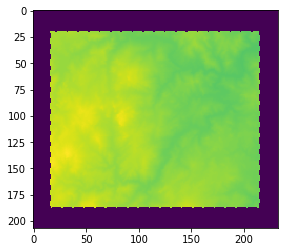

In [27]:
import arcpy
import matplotlib.pyplot as plt
arcpy.env.workspace = r"C:\Geog503\data\testdata.gdb"
image = arcpy.RasterToNumPyArray("ElevationInt")
plt.imshow(image)
plt.show()

## List Data

* **Listing data is very common**
* **Several different list functions in ArcPy**
    - ListFields
    - ListIndexes
    - ListDataset
    - ListFeatureClasses
    - ListFiles
    - ListRasters
    - ListTables
    - ListWorkspaces
    - ListVersions
    
* **Similar logic:**
    - Create a list
    - Iterate over the list using a for loop
    
The complete list data functions can be found at <>http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-functions/listdatasets.htm


### Listing Feature Classes

* **The ListFeatureClasses function returns a list of feature classes in the current workspace**
* **General syntax:**
    - ListFeatureClasses ({wild_card}, {feature_type}, {feature_dataset})
    
* **No filtering:**
    - fclist = arcpy.ListFeatureClasses()
* **Filtering based on wild card**
    - fclist = arcpy.ListFeatureClasses("c*")
* **Filtering based on feature type**
    - fclist = arcpy.ListFeatureClasses("", "point")


In [28]:
import arcpy
from arcpy import env 
env.workspace = r"C:\Geog503\data"
fclist = arcpy.ListFeatureClasses()
print(fclist)

[u'amtrak_stations.shp', u'cities.shp', u'counties.shp', u'new_mexico.shp', u'railroads.shp']


In [29]:
import arcpy
from arcpy import env 
env.workspace = r"C:\Geog503\data"
fclist = arcpy.ListFeatureClasses("*es.shp")
print(fclist)

[u'cities.shp', u'counties.shp']


## Listing Fields

* The **ListFields** function lists the fields in a feature class or table in a specified dataset.
* General syntax:
    - ListFields(dataset, {wild_card}, {field_type})


In [30]:
import arcpy
from arcpy import env
env.workspace = r"C:\Geog503\data"
fieldlist = arcpy.ListFields("cities.shp")
for field in fieldlist:
    print("{:15} : {}".format(field.name,field.type))

FID             : OID
Shape           : Geometry
CITIESX020      : Double
FEATURE         : String
NAME            : String
POP_RANGE       : String
POP_2000        : Integer
FIPS55          : String
COUNTY          : String
FIPS            : String
STATE           : String
STATE_FIPS      : String
DISPLAY         : SmallInteger


## Using Lists in for loops

The following script creates a list of fields of type String and determines for each text field what the length of the field is

In [31]:
import arcpy
from arcpy import env
env.workspace = r"C:\Geog503\data"
fieldlist = arcpy.ListFields("cities.shp","", "String")
for field in fieldlist:
    print("{:15} {}".format(field.name, str(field.length)))

FEATURE         27
NAME            48
POP_RANGE       21
FIPS55          5
COUNTY          55
FIPS            5
STATE           2
STATE_FIPS      2


The following script creates a list of TIFF files and iterates through each file in the list to build pyramids

In [32]:
import arcpy
from arcpy import env
env.workspace = r"C:\Geog503\data"
tifflist = arcpy.ListRasters("", "TIF" )
for tiff in tifflist:
    arcpy.BuildPyramids_management(tiff)

 ## Working with Dictionaries
 
* **Dictionaries consist of pairs of keys and values.**
* **Pairs are referred to as the items.**


In [33]:
capital = { }
capital["NY"] = "Albany"
capital["OH"] = "Columbus"
capital["CO"] = "Denver"
print(capital.keys())
print(capital.values())
print(capital.items())

['NY', 'CO', 'OH']
['Albany', 'Denver', 'Columbus']
[('NY', 'Albany'), ('CO', 'Denver'), ('OH', 'Columbus')]
